In [1]:
cd /home/jovyan

/home/jovyan


In [2]:
import pandas as pd

In [3]:
import pickle
from pymongo import MongoClient

mongo_client = MongoClient('this_mongo')
data_collection = mongo_client.data.datasets

target_dict_from_mongo = data_collection.find_one({"dataset" : "target"})
target_from_mongo = pickle.loads(target_dict_from_mongo["data"])
features_dict_from_mongo = data_collection.find_one({"dataset" : "features"})
features_from_mongo = pickle.loads(features_dict_from_mongo["data"])

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
rfc = RandomForestClassifier()
gs_params = {
    "n_estimators" : [1,5,10,20]
}
grid_search = GridSearchCV(rfc, gs_params, cv=5, return_train_score=False)

grid_search.fit(features_from_mongo, target_from_mongo)

pd.DataFrame(grid_search.cv_results_).T

,0,1,2,3
mean_fit_time,0.0786349,0.247693,0.390326,0.713871
std_fit_time,0.0196134,0.0350818,0.0377458,0.0144686
mean_score_time,0.00682774,0.0160707,0.0195105,0.0358316
std_score_time,0.00293425,0.00878393,0.00251644,0.00280136
param_n_estimators,1,5,10,20
params,{'n_estimators': 1},{'n_estimators': 5},{'n_estimators': 10},{'n_estimators': 20}
split0_test_score,0.80126,0.831261,0.839715,0.842698
split1_test_score,0.799271,0.827449,0.835571,0.838389
split2_test_score,0.799436,0.828112,0.836234,0.83756
split3_test_score,0.807858,0.833554,0.841015,0.847314


In [6]:
rfc = RandomForestClassifier()
gs_params = {
    "n_estimators" : [20, 30, 40]
}
grid_search = GridSearchCV(rfc, gs_params, cv=5, return_train_score=False)

grid_search.fit(features_from_mongo, target_from_mongo)

pd.DataFrame(grid_search.cv_results_).T

,0,1,2
mean_fit_time,0.762644,1.17543,1.77282
std_fit_time,0.0507719,0.0917418,0.102468
mean_score_time,0.0364158,0.0715637,0.0828474
std_score_time,0.00331159,0.0240483,0.00522333
param_n_estimators,20,30,40
params,{'n_estimators': 20},{'n_estimators': 30},{'n_estimators': 40}
split0_test_score,0.842035,0.841538,0.844025
split1_test_score,0.8364,0.83872,0.835405
split2_test_score,0.83524,0.83872,0.839881
split3_test_score,0.844662,0.84748,0.848309


In [7]:
2**(len(features_from_mongo.columns))

2535301200456458802993406410752

In [8]:
best_estimator = grid_search.best_estimator_

In [9]:
feature_importances = best_estimator.feature_importances_
feature_importances = pd.Series(feature_importances, index=features_from_mongo.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances[:20]

age                                   0.230420
hours_per_week                        0.119678
capital_gain                          0.112875
marital_status_ Married-civ-spouse    0.062383
relationship_ Husband                 0.053024
capital_loss                          0.038517
occupation_ Exec-managerial           0.024018
education_ Bachelors                  0.022809
occupation_ Prof-specialty            0.020481
education_ Masters                    0.016481
marital_status_ Never-married         0.015394
gender                                0.014831
education_ HS-grad                    0.014107
relationship_ Not-in-family           0.013232
workclass_ Private                    0.012008
education_ Some-college               0.009987
relationship_ Own-child               0.009822
workclass_ Self-emp-not-inc           0.009351
marital_status_ Divorced              0.009329
education_ Prof-school                0.009068
dtype: float64

In [10]:
top_5 = feature_importances[:5].index
top_5

Index(['age', 'hours_per_week', 'capital_gain',
       'marital_status_ Married-civ-spouse', 'relationship_ Husband'],
      dtype='object')

In [11]:
top_10 = feature_importances[:20].index
top_10

Index(['age', 'hours_per_week', 'capital_gain',
       'marital_status_ Married-civ-spouse', 'relationship_ Husband',
       'capital_loss', 'occupation_ Exec-managerial', 'education_ Bachelors',
       'occupation_ Prof-specialty', 'education_ Masters',
       'marital_status_ Never-married', 'gender', 'education_ HS-grad',
       'relationship_ Not-in-family', 'workclass_ Private',
       'education_ Some-college', 'relationship_ Own-child',
       'workclass_ Self-emp-not-inc', 'marital_status_ Divorced',
       'education_ Prof-school'],
      dtype='object')

In [12]:
binary_features = list(feature_importances.index)
binary_features.remove("age")
binary_features.remove("hours_per_week")
binary_features.remove("capital_gain")
binary_features.remove("capital_loss")

In [13]:
scores = []
for i in range(1, len(binary_features[:30])):
    rfc = RandomForestClassifier(n_estimators=30)
    grid_search = GridSearchCV(rfc, {}, cv=5, return_train_score=False)
    grid_search.fit(features_from_mongo[binary_features[:i]], target_from_mongo)
    scores.append(grid_search.best_score_)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

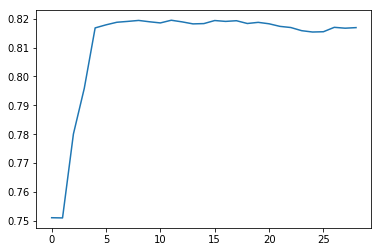

In [15]:
plt.plot(scores)

In [16]:
for item in zip(scores[:10], binary_features[:10]):
    print(item)

(0.75107751475366358, 'marital_status_ Married-civ-spouse')
(0.75101120615343808, 'relationship_ Husband')
(0.78005437305218484, 'occupation_ Exec-managerial')
(0.79586897420595448, 'education_ Bachelors')
(0.81678933757708372, 'occupation_ Prof-specialty')
(0.81785027518069098, 'education_ Masters')
(0.8187454412837345, 'marital_status_ Never-married')
(0.81904382998474901, 'gender')
(0.81937537298587626, 'education_ HS-grad')
(0.81891121278429813, 'relationship_ Not-in-family')


In [17]:
final_features_names = binary_features[:8]
final_features_names

['marital_status_ Married-civ-spouse',
 'relationship_ Husband',
 'occupation_ Exec-managerial',
 'education_ Bachelors',
 'occupation_ Prof-specialty',
 'education_ Masters',
 'marital_status_ Never-married',
 'gender']

In [18]:
final_features_names_dict = {
    "dataset" : "final_features_names",
    "data" : final_features_names
}

In [19]:
data_collection.delete_many({"dataset" : "final_features_names"})

In [20]:
data_collection.insert_one(final_features_names_dict)

In [21]:
%run src/final_feature_preparation.py

<Figure size 432x288 with 0 Axes>